**Customer Segmentation Using K-Means Clustering BY Azimatul Matsniya**
1. Descriptive Statistics and EDA (Exploratory Data Analysis)
    * Descriptive Statistics - numeric data (mean, median, mode)
    * Descriptive Statistics - string data (count and grouping)
2. Analysis KPI
    * Annual Revenue
    * Monthly Revenue
    * Monthly Average Sales
    * Monthly Growth Rate
3. Customer Clustering using K-Means Clustering
    * Correlation Matrix
    * Removing Outlier
    * Log transformation and standardize data
    * Final Clustering
    * Segmen Interpretation



In [3]:
#importing libraries yang dibutuhkan
import pandas as pd
import numpy as np

#viz Libraries
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns

#datetime
import datetime as dt

from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OrdinalEncoder,
    PowerTransformer,
    FunctionTransformer
)
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

from scipy.stats import norm

#file directoryy
import os

#warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-22,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-21,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-21,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-21,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-21,Kanyon


In [5]:
print(df.dtypes)
print(df.shape)

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object
(99457, 10)


In [6]:
# Cek data yang mengandung missing value
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
# Cek data duplikat
df[df.duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [8]:
# Convert dan mengubah beberapa tipe data
df['invoice_date']=pd.to_datetime(df['invoice_date'])
df['gender_id'] = df['gender'].map({'Female':1, 'Male':0})
df['sales'] = df['price']*df['quantity']
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month
df['day'] = df['invoice_date'].dt.day
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,gender_id,sales,year,month,day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,1,7502.00,2022,5,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,0,5401.53,2021,12,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,0,300.08,2021,9,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1,15004.25,2021,5,16
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1,242.40,2021,10,24


# **Statistika Deskriptif Dan EDA (Exploratory Data Analysis)**

In [9]:
# Statistika Deskriptif untuk data numeric
df[['age','quantity','price','sales']].describe()

,age,quantity,price,sales
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2528.789268
std,14.990054,1.413025,941.184567,4222.475781
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,45.450000,136.350000
50%,43.000000,3.000000,203.300000,600.170000
75%,56.000000,4.000000,1200.320000,2700.720000
max,69.000000,5.000000,5250.000000,26250.000000


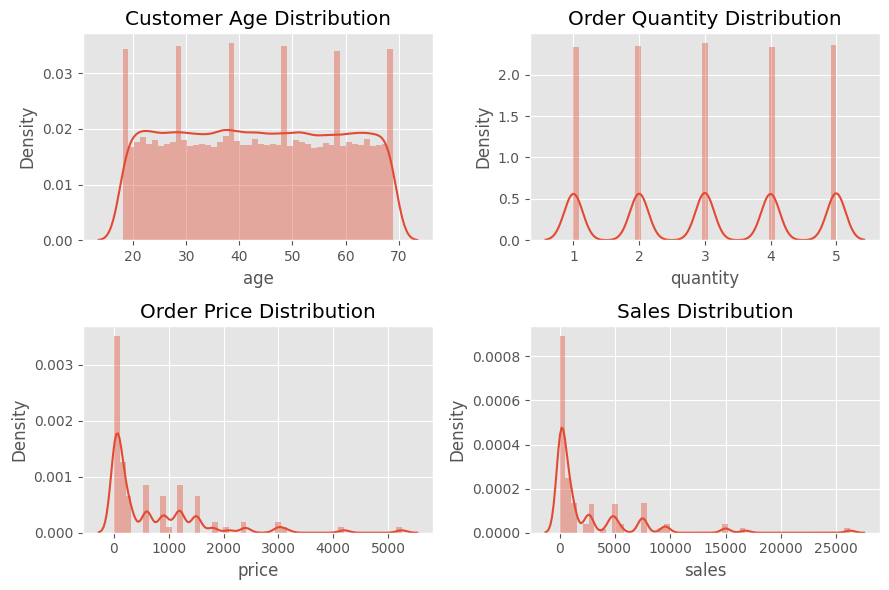

In [10]:
plt.figure(figsize=(9,6))

plt.subplot(2,2,1)
sns.distplot(df['age'])
plt.title('Customer Age Distribution')

plt.subplot(2,2,2)
sns.distplot(df['quantity'])
plt.title('Order Quantity Distribution')

plt.subplot(2,2,3)
sns.distplot(df['price'])
plt.title('Order Price Distribution')

plt.subplot(2,2,4)
sns.distplot(df['sales'])
plt.title('Sales Distribution')

plt.tight_layout()
plt.show()

In [11]:
# Statistika Desskriptif untuk Data String
s1 = df.groupby(['gender'])['customer_id'].count().reset_index()
s3 = df.groupby(['payment_method'])['customer_id'].count().reset_index()
s4 = df.groupby(['shopping_mall'])['customer_id'].count().reset_index().sort_values('customer_id',ascending=False)
print(s1)
print(s3)
print(s4)

   gender  customer_id
0  Female        59482
1    Male        39975
  payment_method  customer_id
0           Cash        44447
1    Credit Card        34931
2     Debit Card        20079
       shopping_mall  customer_id
5   Mall of Istanbul        19943
4             Kanyon        19823
6          Metrocity        15011
7       Metropol AVM        10161
3       Istinye Park         9781
9       Zorlu Center         5075
0        Cevahir AVM         4991
2     Forum Istanbul         4947
8     Viaport Outlet         4914
1  Emaar Square Mall         4811


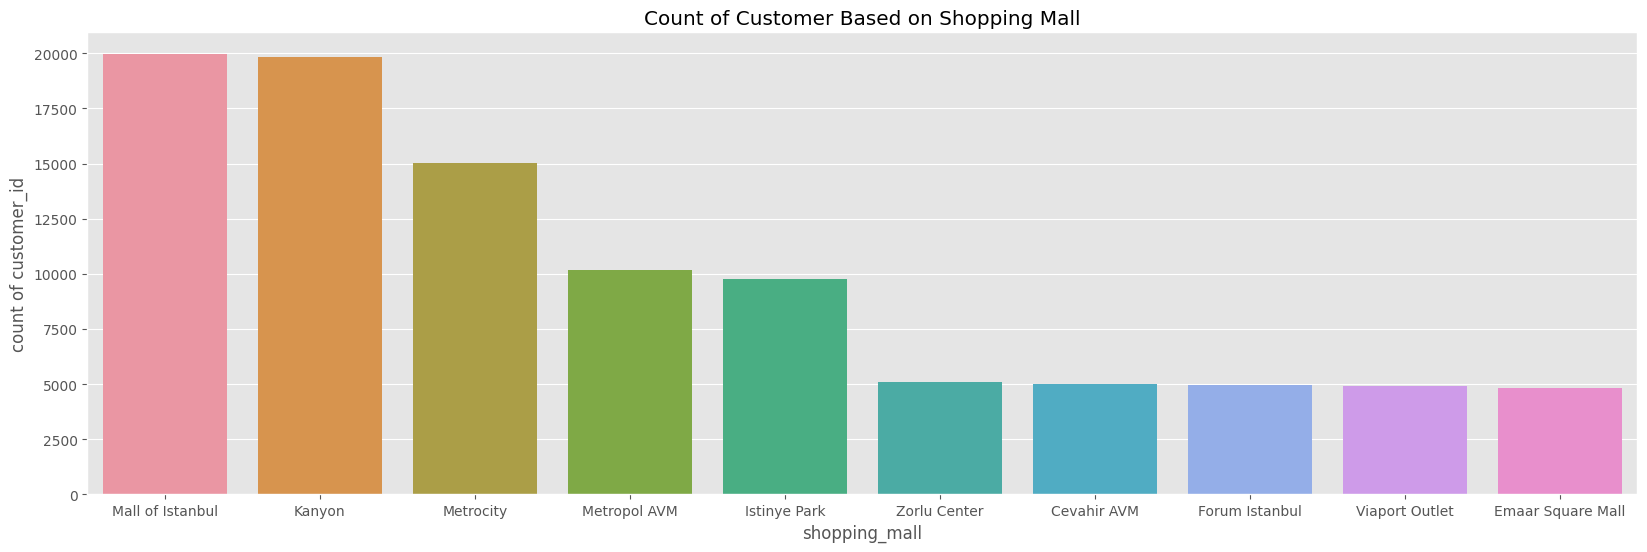

In [12]:
plt.figure(figsize=(20,6))
sns.barplot(x="shopping_mall", y="customer_id", data=s4)
plt.xlabel('shopping_mall')
plt.ylabel('count of customer_id')
plt.title('Count of Customer Based on Shopping Mall')
plt.show()

* Jumlah Customer Perempuan 59% dari keseluruhan customer
* Pengguna dengan pembayaran cash lebih banyak dari metode pembayaran lainnya yakni sebanyak 44.447 (44,7%)
* Top 3 Mall dengan jumlah pembeli terbanyak adalah Mall of Istanbul, Kanyon, Metrocity



In [13]:
s5 = df.groupby(['gender'])['age'].mean().reset_index()
s6 = df.groupby(['payment_method'])['age'].mean().reset_index()
s7 = df.groupby(['category'])['age'].mean().reset_index()
print(s5)
print(s6)
print(s7)

   gender        age
0  Female  43.453515
1    Male  43.387767
  payment_method        age
0           Cash  43.457421
1    Credit Card  43.427901
2     Debit Card  43.358534
          category        age
0            Books  43.541859
1         Clothing  43.409227
2        Cosmetics  43.580645
3  Food & Beverage  43.354426
4            Shoes  43.454953
5         Souvenir  43.393079
6       Technology  43.368495
7             Toys  43.326262


Dari keseluruhan summary diatas, memperlihatkan bahwa rata rata umur customer di semua aspek adalah 43.  

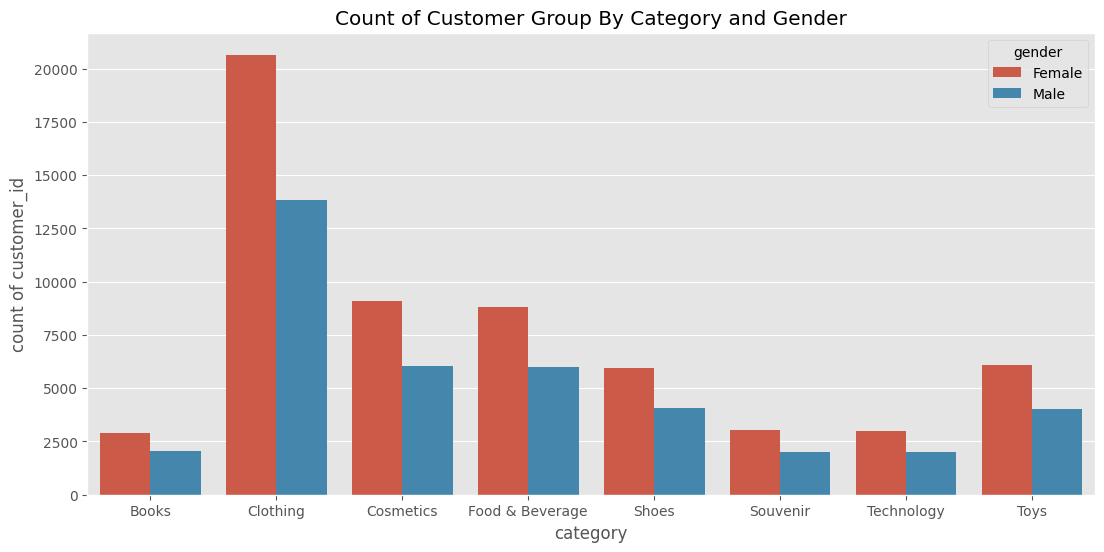

In [14]:
s2 = df.groupby(['category','gender'])['customer_id'].count().reset_index()
s2
plt.figure(figsize=(13,6))
sns.barplot(x="category", y="customer_id",hue="gender", data=s2)
plt.xlabel('category')
plt.ylabel('count of customer_id')
plt.title('Count of Customer Group By Category and Gender')
plt.show()

* Category Clothing menyumbangkan customer terbanyak dengan perbandingan customer perempuan dan laki-laki adalah 6:4.
* Category cosmetics dan F&B menempati urutan kedua dalam jumlah customer terbanyak.
* Category dengan presentase jumlah customer yang cukup rendah adalah Books, Souvenir, Technology. 

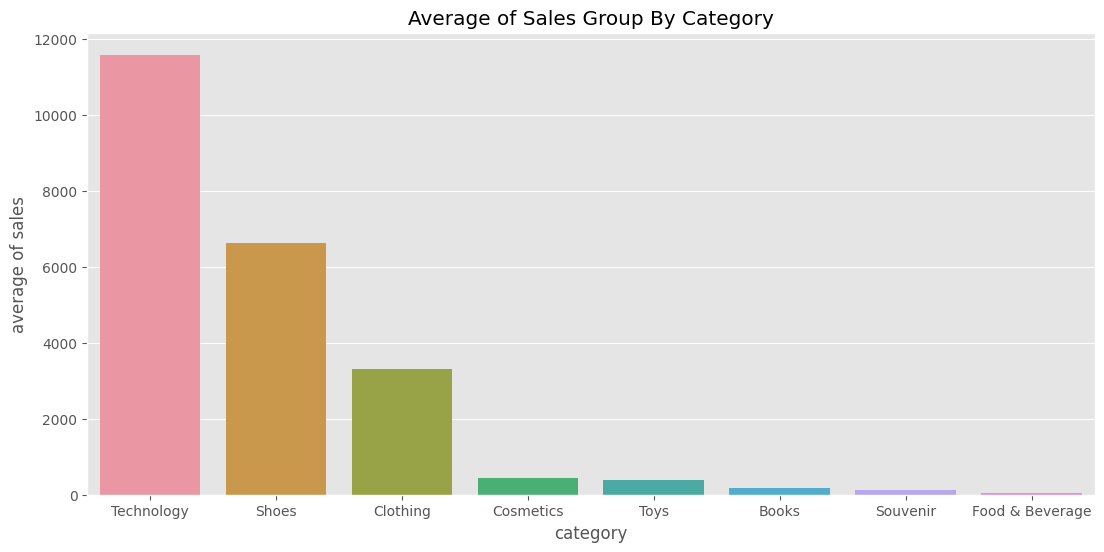

In [15]:
s8 = df.groupby(['category'])['sales'].mean().reset_index().sort_values('sales',ascending=False)
s8
plt.figure(figsize=(13,6))
sns.barplot(x="category", y="sales", data=s8)
plt.xlabel('category')
plt.ylabel('average of sales')
plt.title('Average of Sales Group By Category')
plt.show()

* Dari keseluruhan category, technology menyumbang penjualan paling besar dilanjutkan shoes dan clothing dengan rata-rata penjualannya berada di angka berturut-turut 11.581,7 ; 6.632,8 ; 3.305,5.
* Dari 2 summary ini dan sebelumnya, dapat diasumsikan bahwa jumlah pembelian category technology dan shoes tidak terlalu banyak namun dengan harga setiap barangnya yang tinggi dapat berpengaruh pada keseluruhan rata-rata penjualan yang didapatkan menjadi tinggi. 

# **Analisis KPI**
1. Annual Revenue (Sum) : Jumlah Pendapatan Tahunan
2. Monthly Revenue (Sum) : Jumlah Pendapatan Bulanan
3. Monthly Revenue Growth Rate : Persentase pertumbuhan jumlah pendapatan setiap bulannya.
4. Monthly Average Sales : Rata-rata penjualan bulanan

In [16]:
# cek jumlah tahun dan bulan setiap tahunnya
df.groupby(['year'])['month'].nunique()

year
2021    12
2022    12
2023    12
Name: month, dtype: int64

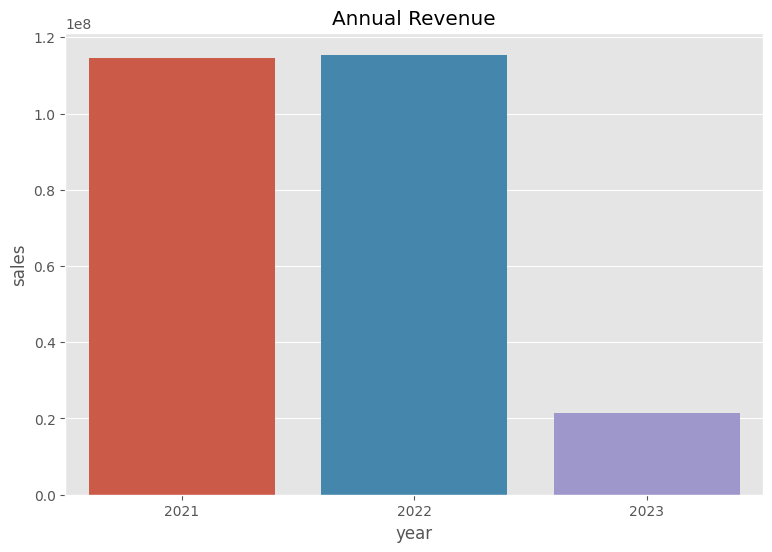

In [17]:
# Annual Revenue
annual_revenue = df.groupby(['year'])['sales'].sum().reset_index()
annual_revenue
plt.figure(figsize=(9,6))
sns.barplot(x='year', y="sales", data=annual_revenue)
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Annual Revenue')
plt.show()

In [18]:
print(annual_revenue)

   year         sales
0  2021  1.145606e+08
1  2022  1.154368e+08
2  2023  2.150841e+07


* Terdapat penurunan drastis di jumlah pendapatan pada tahun 2023. Banyak faktor yang dapat mempengaruhinya namun tidak dibahas lanjut disini.

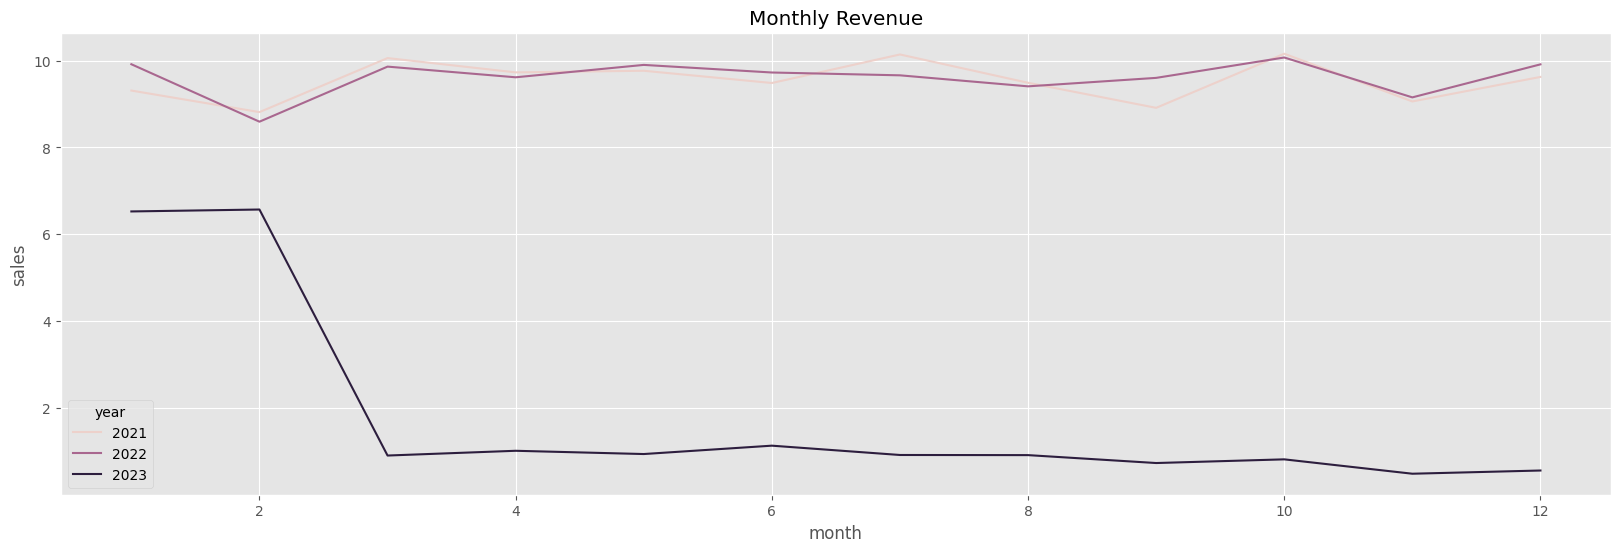

In [19]:
monthly_revenue = df.groupby(['year','month'])['sales'].sum().reset_index()
monthly_revenue['sales'] = monthly_revenue['sales']/1e6
plt.figure(figsize=(20,6))
sns.lineplot(x='month', y="sales", hue='year', data=monthly_revenue)
plt.xlabel('month')
plt.ylabel('sales')
plt.title('Monthly Revenue')
plt.show()

* Dari data monthly revenue dapat dilihat memang ada penurunan jumlah pendapatan secara drastis pada bulan kedua menuju bulan ketiga, dari sekitar 6 juta hanya menjadi 1 juta.
* Monthly revenue sepanjang tahun 2021 dan 2022 cenderung naik turun secara stabil di kisaran angka 8 juta ke atas.

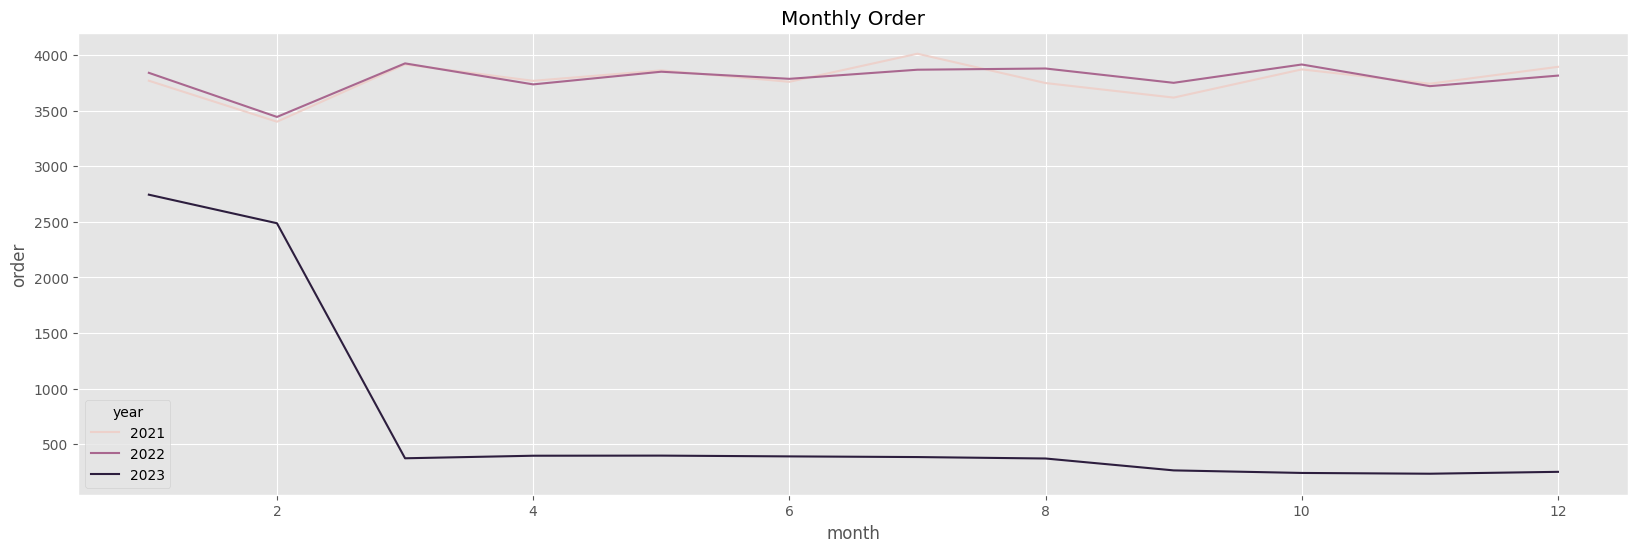

In [20]:
count_revenue = df.groupby(['year','month'])['customer_id'].count().reset_index()
plt.figure(figsize=(20,6))
sns.lineplot(x='month', y="customer_id", hue='year', data=count_revenue)
plt.xlabel('month')
plt.ylabel('order')
plt.title('Monthly Order')
plt.show()

* Terdapat penurunan drastis di jumlah angka order pada tahun 2021 dari bulan 2 menuju bulan 4.
* Penurunan order ini yang mengakibatkan jumlah pendapatan pada monthly revenue sebelumnya terlihat turun drastis.

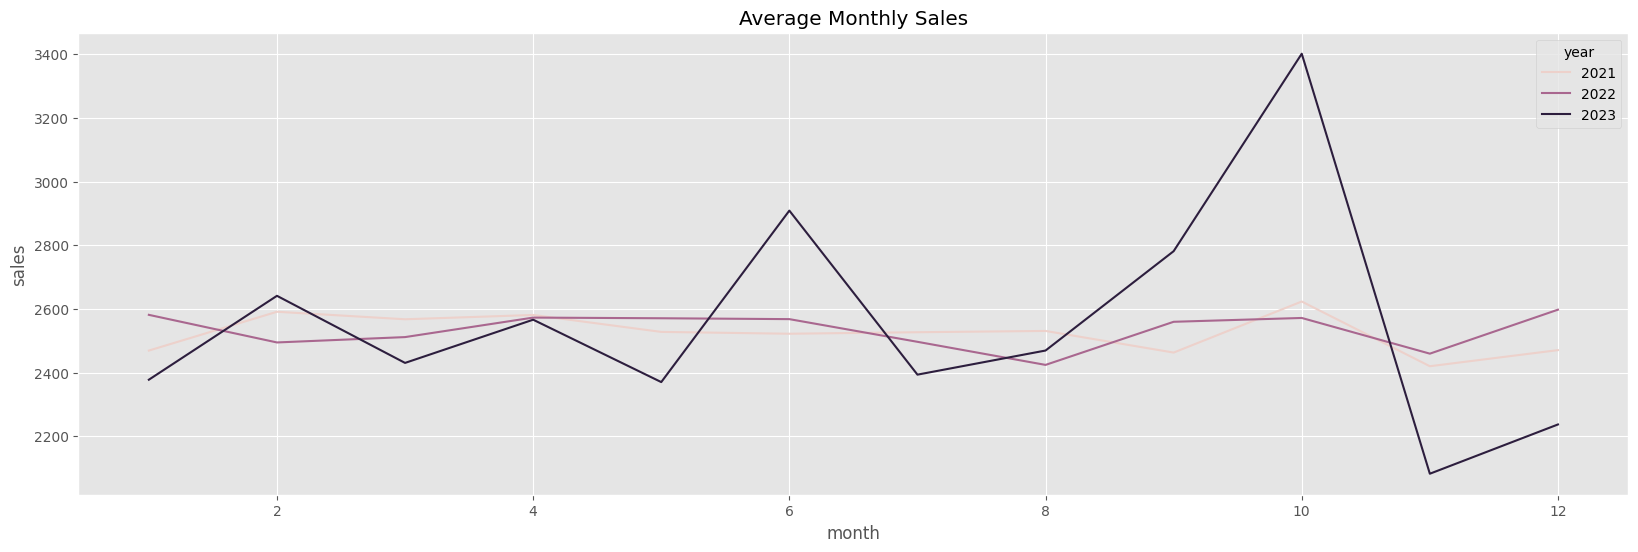

In [21]:
average_revenue = df.groupby(['year','month'])['sales'].mean().reset_index()
plt.figure(figsize=(20,6))
sns.lineplot(x='month', y="sales", hue='year', data=average_revenue)
plt.xlabel('month')
plt.ylabel('sales')
plt.title('Average Monthly Sales')
plt.show()

* Pada tahun 2023 memang terjadi penurunan dan peningkatan rata-rata penjualan yang fluktuatif. Hal ini sejalan dengan summary pada monthly revenue sebelumnya yang juga terdapat penurunan drastis pada tahun ini.

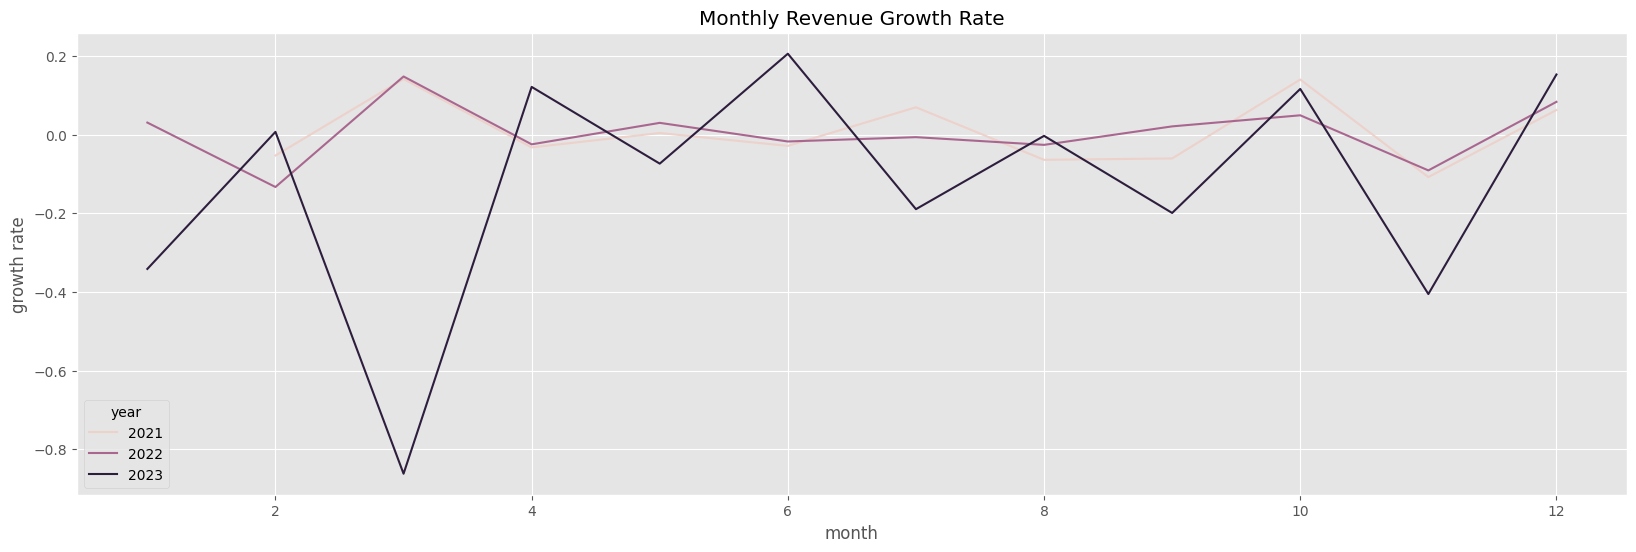

In [22]:
monthly_revenue['growth rate']=monthly_revenue['sales'].pct_change()
plt.figure(figsize=(20,6))
sns.lineplot(x='month', y="growth rate", hue='year', data=monthly_revenue)
plt.xlabel('month')
plt.ylabel('growth rate')
plt.title('Monthly Revenue Growth Rate')
plt.show()

Dari bulan kedua menuju bulan keempat di tahun 2023 memang terjadi penuruna presentasi pertumbuhan penjualan. Hal ini dapat disebabkan oleh berbagai faktor namun tidak dibahas lebih lanjut disini.

**Analisis RFM**
* Recency : Jarak terakhir kali membeli dengan tanggal terkini (data terbaru)
* Frequency : Banyaknya frekuensi order by customer
* Monetary : Jumlah transaksi setiap pelanggan 

In [23]:
ref_date = df["invoice_date"].max() + dt.timedelta(days=1)

df_rfm = df.groupby("customer_id").agg({
    "invoice_date": lambda x : (ref_date - x.max()).days,
    "customer_id": "count",
    "sales": "sum"
}).rename(columns={
    "invoice_date": "recency",
    "customer_id": "frequency",
    "sales": "monetary"
})
df_rfm.head()

,recency,frequency,monetary
customer_id,,,
C100004,737,1,7502.00
C100005,275,1,2400.68
C100006,690,1,322.56
C100012,840,1,130.75
C100019,861,1,35.84


Dari hasil analisis rfm diatas dapat dilihat bahwa frequency seluruh pembelian customer adalah hanya 1 kali. Sehingga, recency nya akan terhitung lama untuk pembeli yang membeli pada tahun 2021. Oleh karena itu, tidak melakukan analisis rfm lebih lanjut karena terjadi adanya bias disitu.

# **K-MEANS**

Prepocessing
1. Correlation Matrix
2. Removing Outlier
3. Standarisasi dan Log Transformation

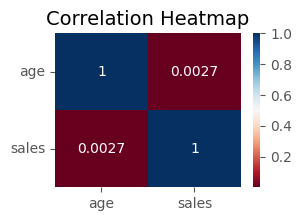

In [24]:
plt.figure(figsize=(3,2))
sns.heatmap(df[['age','sales']].corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

* Dari matriks korelasi tersebut terlihat hubungan antara age dan sales tidak terlalu kuat hanya di angka 0,0027.
* Pada clustering kali ini menggunakan data age dan sales bertujuan untuk menentukan segmentasi pasar berdasarkan usia dan jumlah penjualan yang dihasilkan

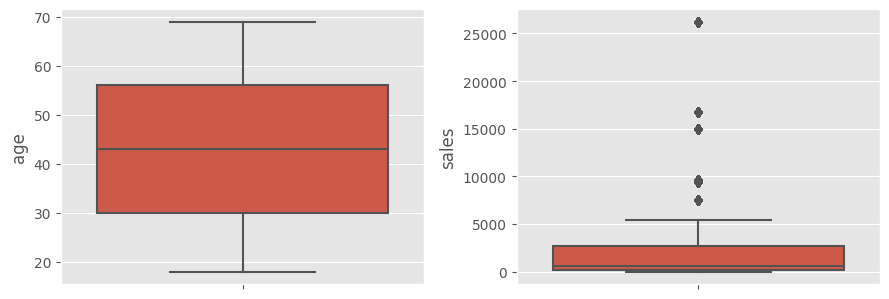

In [25]:
plt.figure(figsize=(9,6))

plt.subplot(2,2,1)
sns.boxplot(data=df[['age','sales']], y='age')

plt.subplot(2,2,2)
sns.boxplot(data=df[['age','sales']], y='sales')

plt.tight_layout()
plt.show()

In [26]:
# Fungsi untuk menentukan outlier
def find_outlier_rows(df, col, level='both'):
    # compute the interquartile range
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

    # compute the upper and lower bounds for identifying outliers
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr

    # filter the rows based on the level of outliers to return
    if level == 'lower':
        return df[df[col] < lower_bound]
    elif level == 'upper':
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [27]:
def count_outliers(df):
    # select numeric columns
    df_numeric = df[['age','sales']]

    # get column names
    columns = df_numeric.columns

    # find the name of all columns with outliers
    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]

    # dataframe to store the results
    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

    # count the outliers and compute the percentage of outliers for each column
    for col in outlier_cols:
        outlier_count = len(find_outlier_rows(df_numeric, col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        # store the results in the dataframe
        outliers_df.loc[col] = [outlier_count, outlier_percent]

    # return the resulting dataframe
    return outliers_df

In [47]:
# count the outliers in sales dataframe
print(count_outliers(df).sort_values('outlier_counts', ascending=False))


Empty DataFrame
Columns: [outlier_counts, outlier_percent]
Index: []


In [48]:
# find the outliers in sales
a = find_outlier_rows(df, 'sales')
df.drop(a.index, axis=0, inplace = True)

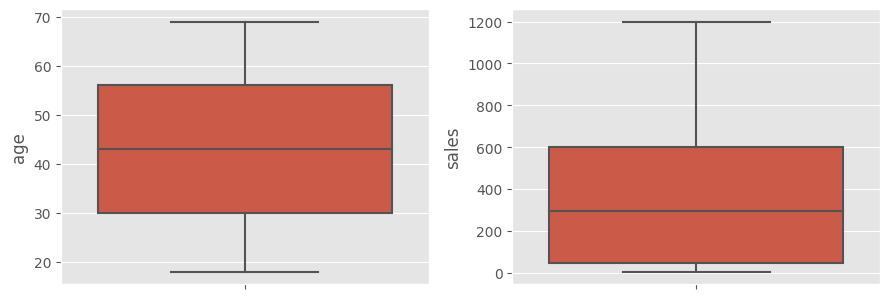

In [49]:
plt.figure(figsize=(9,6))

plt.subplot(2,2,1)
sns.boxplot(data=df[['age','sales']], y='age')

plt.subplot(2,2,2)
sns.boxplot(data=df[['age','sales']], y='sales')

plt.tight_layout()
plt.show()

In [50]:
# X is our data

X = df[['age','sales']]
X.shape

(66660, 2)

In [51]:
X.head()

,age,sales
2,20,300.08
4,53,242.40
6,49,40.66
7,32,1200.32
9,60,1200.32


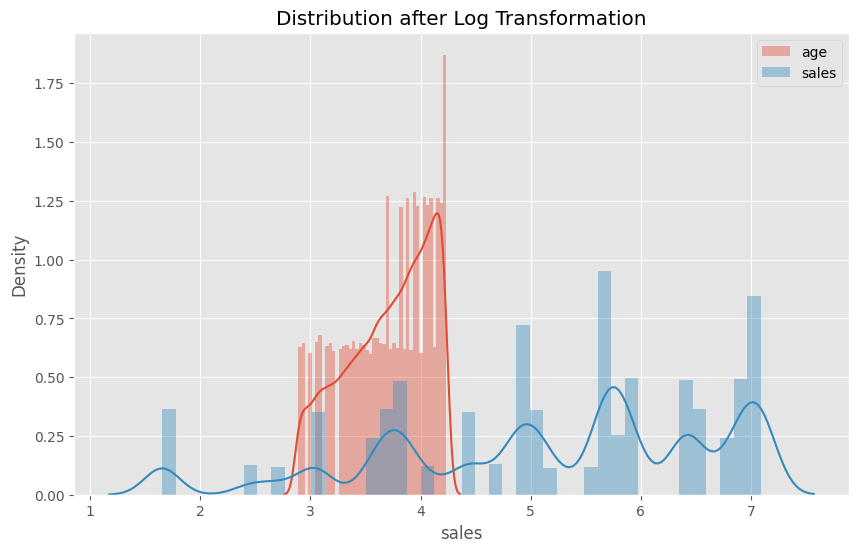

In [52]:
# Log transformation digunakan untuk mengurangi skewness pada data
X_log = np.log(X)

plt.figure(figsize=(10,6))
sns.distplot(X_log['age'],label='age')
sns.distplot(X_log['sales'],label='sales')

plt.title('Distribution after Log Transformation')
plt.legend()
plt.show()

In [53]:
# Stadarisasi data supaya variance dan mean => equal

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X_log)

# Scale and center the data
X_normal = scaler.transform(X_log)

# Create a pandas DataFrame
X_normal = pd.DataFrame(X_normal, index=X_log.index, columns=X_log.columns)

# Print summary statistics
X_normal.describe().round(2)

,age,sales
count,66660.00,66660.00
mean,-0.00,0.00
std,1.00,1.00
min,-2.14,-2.39
25%,-0.79,-0.90
50%,0.15,0.34
75%,0.85,0.82
max,1.40,1.29


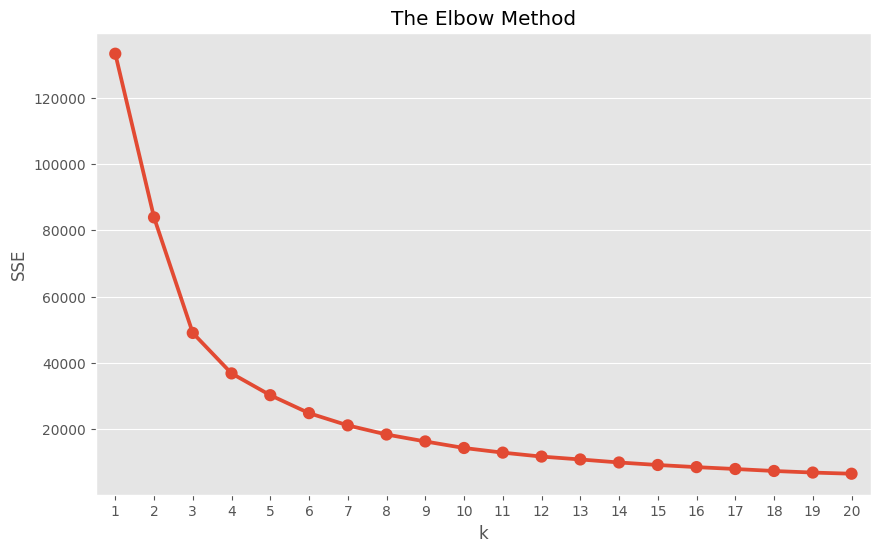

In [54]:
# Fit KMeans and calculate SSE for each k
sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_normal)
    sse[k] = kmeans.inertia_ 

    
plt.figure(figsize=(10,6))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [64]:
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(X_normal)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
X['label'] = cluster_labels
X.head()

,age,sales,label
2,20,300.08,2
4,53,242.40,0
6,49,40.66,1
7,32,1200.32,2
9,60,1200.32,0


In [65]:
df['label'] = cluster_labels
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,gender_id,sales,year,month,day,label
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,0,300.08,2021,9,11,2
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1,242.40,2021,10,24,0
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,1,40.66,2022,3,13,1
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul,1,1200.32,2021,1,13,2
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,2021-08-22,Kanyon,1,1200.32,2021,8,22,0


In [66]:
segm_analysis = df[['age','quantity','price','sales','label']].groupby(['label']).mean()
segm_analysis

,age,quantity,price,sales
label,,,,
0,52.892086,2.902606,259.269232,559.335915
1,47.444579,1.853017,19.971291,35.867311
2,26.268111,2.818919,202.993067,435.001158


In [67]:
df.groupby(['payment_method','label'])['customer_id'].count().reset_index()

,payment_method,label,customer_id
0,Cash,0,12968
1,Cash,1,7782
2,Cash,2,9006
3,Credit Card,0,10209
4,Credit Card,1,6106
5,Credit Card,2,7134
6,Debit Card,0,5911
7,Debit Card,1,3461
8,Debit Card,2,4083


In [68]:
df.groupby(['category','label'])['customer_id'].count().reset_index()

,category,label,customer_id
0,Books,0,1829
1,Books,1,1666
2,Books,2,1486
3,Clothing,0,8911
4,Clothing,2,4880
5,Cosmetics,0,7843
6,Cosmetics,1,2362
7,Cosmetics,2,4892
8,Food & Beverage,0,1849
9,Food & Beverage,1,9716


In [63]:
df.groupby(['category','label'])['sales'].mean().reset_index()

,category,label,sales
0,Books,0,252.704319
1,Books,1,35.474280
2,Books,2,210.805215
3,Clothing,0,770.152575
4,Clothing,2,723.820016
5,Cosmetics,0,561.966510
6,Cosmetics,1,40.660000
7,Cosmetics,2,467.972330
8,Food & Beverage,0,128.484327
9,Food & Beverage,1,34.322817
